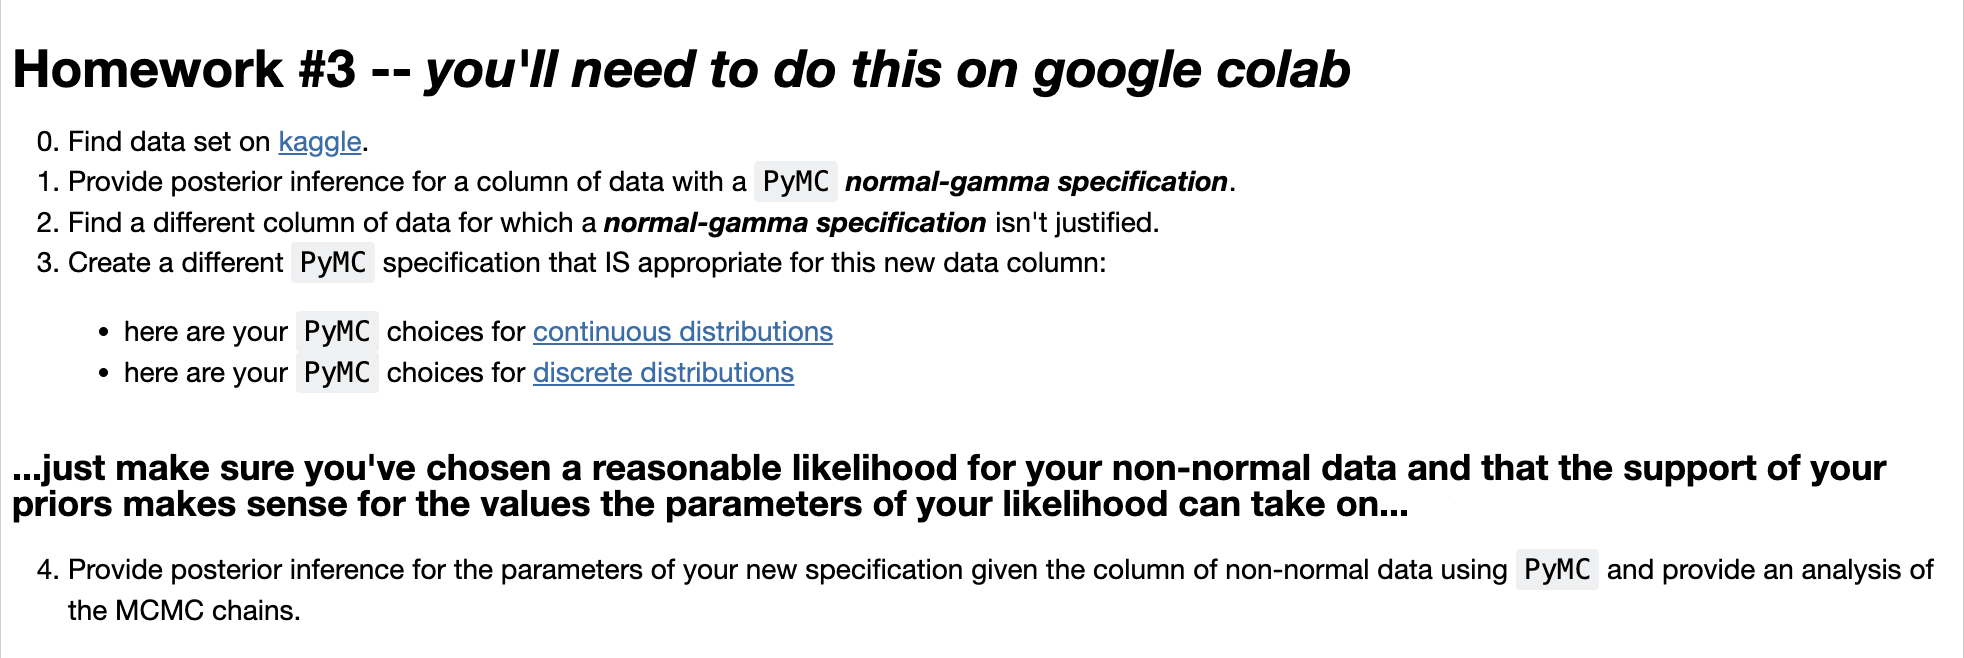

Part 0: I have found a dataset about "smokers' status", and here is the link toward the dataset: https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction.

The dataset provides data on 22 biodata signatures (eg. age, height, weight, waist, hearing...) from 16,708 smokers.

In [65]:
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('smoker.csv')

# Create a Summary Table
data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,...,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000,16708.000000
mean,44.312006,164.555602,65.692782,82.009792,1.007182,1.004351,1.026095,1.026035,121.537587,76.029148,...,126.470254,57.283816,114.691525,14.618692,1.088820,0.885055,26.147235,26.781362,40.062246,0.210797
std,12.089099,9.210712,12.639255,9.150549,0.458500,0.467140,0.159423,0.159245,13.751759,9.727289,...,71.259041,15.018255,35.948974,1.559794,0.411293,0.223621,19.769301,30.085442,51.657330,0.407887
min,20.000000,135.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,79.000000,40.000000,...,16.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,107.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,30.000000,43.000000,0.000000
max,85.000000,190.000000,125.000000,125.800000,9.900000,9.900000,2.000000,2.000000,240.000000,140.000000,...,405.000000,618.000000,1660.000000,20.900000,6.000000,10.300000,1311.000000,2062.000000,999.000000,1.000000


Part1: The variable I chose here is 'waist(cm)', a column of data with a PyMC normal-gamma specification.

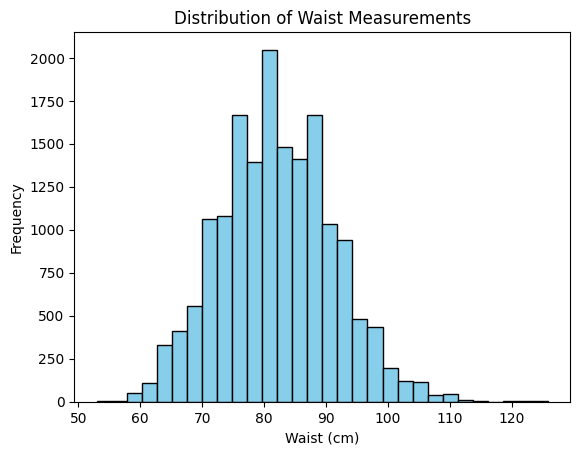

In [64]:
# Using histogram to examine 'waist(cm)''s distribution

plt.hist(data['waist(cm)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Waist Measurements')
plt.xlabel('Waist (cm)')
plt.ylabel('Frequency')
plt.show()

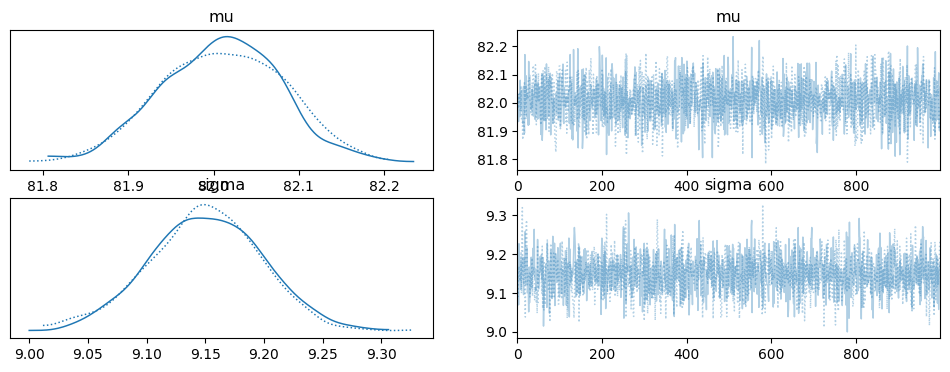

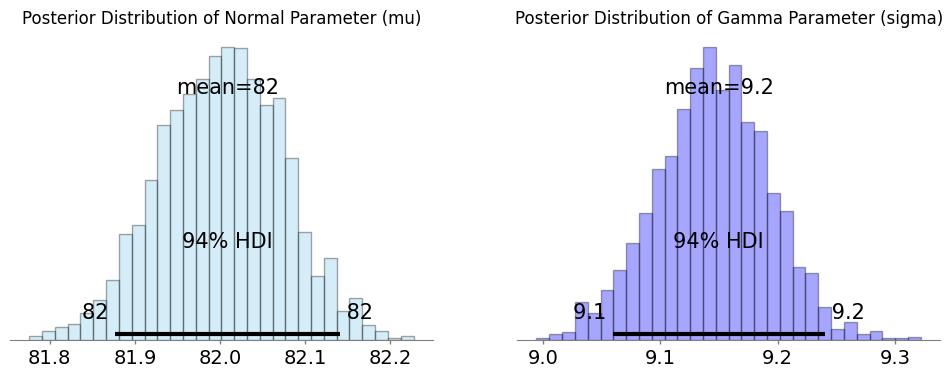

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,82.009,0.072,81.876,82.141,0.002,0.001,2175.0,1378.0,1.0
sigma,9.150,0.048,9.060,9.240,0.001,0.001,2021.0,1438.0,1.0


In [66]:
# After checking that "waist(cm)" is normally distributed
# Define the posterior inference for 'waist(cm)'

import pymc as pm
import arviz as az

normal_data = data['waist(cm)']

with pm.Model() as normal_gamma_model:
    mu = pm.Normal('mu', mu= normal_data.mean(), sigma=10)
    sigma = pm.Gamma('sigma', alpha=2, beta=1)
    observed_data = pm.Normal('observed_data', mu=mu, sigma=sigma, observed= normal_data)

with normal_gamma_model:
    trace_normal_gamma = pm.sample(1000, tune=1000)

az.plot_trace(trace_normal_gamma)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
pm.plot_posterior(trace_normal_gamma, var_names=['mu'], ax=ax[0], kind='hist', bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Posterior Distribution of Normal Parameter (mu)')
pm.plot_posterior(trace_normal_gamma, var_names=['sigma'], ax=ax[1], kind='hist', bins=30, color='blue', edgecolor='black')
ax[1].set_title('Posterior Distribution of Gamma Parameter (sigma)')
plt.show()

az.summary(trace_normal_gamma)

We examined the waist measurements using PyMC normal-gamma specification. It helped us figure out the mean waist measurements (mu) and the variation across waist sizes (sigma). These results are called posterior inferences and give us a glimpse of the possible range and typical variation in average size. Think of it as a detective revealing the most likely scenarios based on the evidence in our data.

Part2: The variable I chose here is 'age', a different column of data for which a normal-gamma specification isn't justified.

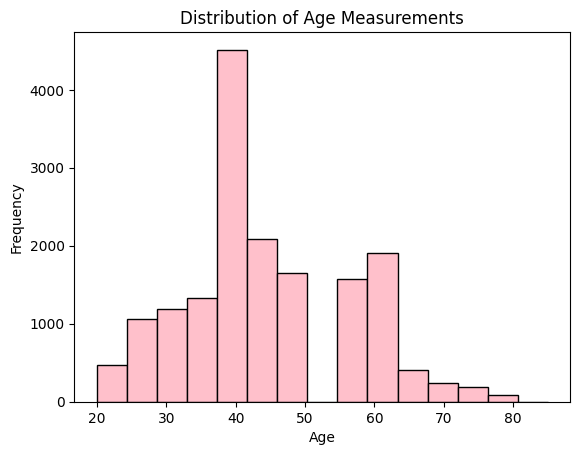

In [42]:
# Using histogram to examine 'age's distribution

plt.hist(data['age'], bins=15, color='pink', edgecolor='black')
plt.title('Distribution of Age Measurements')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Part3: Create a different PyMC specification that IS appropriate for 'Age'.

In [78]:
# After checking that "age" is not normally distributed
# Create a PyMC Laplace specification for 'age'

non_normal_data = data['age']

with pm.Model() as laplace_model:
    mu = pm.Uniform('mu', non_normal_data.min(), non_normal_data.max())
    b = pm.HalfCauchy('b', beta=10)
    likelihood = pm.Laplace('likelihood', mu=mu, b=b, observed=non_normal_data)

with laplace_model:
    trace_laplace = pm.sample(1000, tune=1000)

When dealing with non-normally distributed data, it is crucial to choose the right continuous distribution for modeling. After examining the "non_normal_data" distribution, I chose the Laplace distribution among the provided PyMC choices (https://www.pymc.io/projects/docs/en/stable/api/distributions/continuous.html). In PyMC3, I modeled non-normality by defining the Laplace distribution with prior parameters ("mu" and "b"). We performed MCMC sampling, and subsequent analyses included examining trajectory plots and summary statistics for the posterior distributions of the parameters.

Part4: Provide posterior inference for 'Age' and provide an analysis of the MCMC chains.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,40.022,0.022,39.997,40.064,0.001,0.001,311.0,388.0,1.02
b,9.574,0.076,9.429,9.708,0.004,0.003,451.0,489.0,1.01


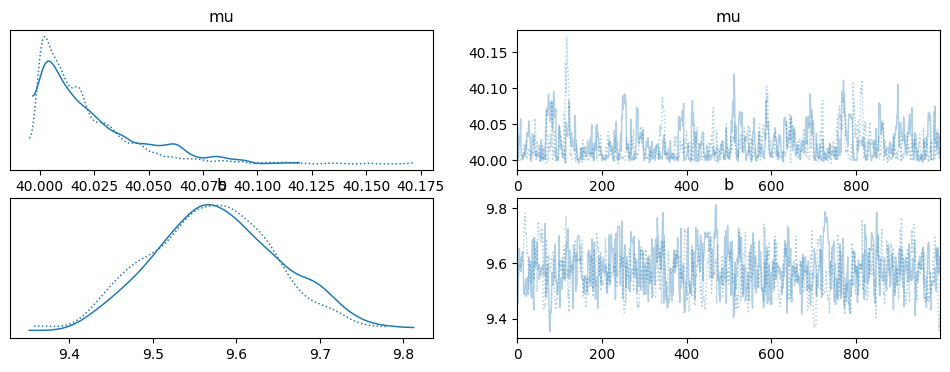

In [79]:
# Visualize the MCMC Chains
az.plot_trace(trace_laplace)

# Provide posterior inference
az.summary(trace_laplace)

Through the above summary statistics for the parameters provided by posterior inference, we know that the mean value for `mu` is 40.022, with a tight standard deviation of 0.022. The 94% HPDI (Highest Posterior Density Interval) indicates a precise estimation, ranging from 39.997 to 40.064. Similarly, for the parameter `b`, the mean is 9.574, and the standard deviation is 0.076. The 94% HPDI for `b` ranges from 9.429 to 9.708, indicating a well-constrained estimation. MCMC diagnostics show good convergence for both parameters, with R-hat statistics close to 1 (1.02 for `mu` and 1.01 for `b`). The effective sample sizes (ESS) further support the reliability of the MCMC sampling, with `mu` having an ESS of 311 and `b` having an ESS of 451. Overall, these results suggest that the Laplace distribution effectively characterizes the underlying distribution of the observed data, providing precise estimates for the location (`mu`) and scale (`b`) parameters."